In [1]:
import requests
url = 'https://apitempo.inmet.gov.br/estacao/2021-05-01/2022-04-26/A201'
resultado = requests.get(url)

In [2]:
import json
dados_org = resultado.json()
dados_str = json.dumps(dados_org)


In [3]:
import pandas as pd
import numpy as np

In [4]:
dados_tabla = pd.read_json(dados_str)
dados_tabla

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1010.0,25.4,-1.411228,1010.0,PA,4.8,23.7,23.9,-48.439512,...,2.4,23.6,25.7,13.1,8.5,27.0,24.0,99.0,A201,0
1,BELÉM,1011.2,26.2,-1.411228,1011.2,PA,3.7,23.6,23.8,-48.439512,...,1.6,23.6,24.4,13.0,7.4,26.0,23.8,99.0,A201,100
2,BELÉM,1011.5,26.9,-1.411228,1011.7,PA,2.4,23.3,23.5,-48.439512,...,0.1,23.2,23.9,13.0,3.5,26.0,23.5,99.0,A201,200
3,BELÉM,1011.4,26.9,-1.411228,1011.6,PA,1.4,23.3,23.2,-48.439512,...,0.4,23.0,23.5,13.0,2.1,25.0,23.5,99.0,A201,300
4,BELÉM,1010.8,25.6,-1.411228,1011.4,PA,1.8,23.1,23.3,-48.439512,...,1.6,23.1,23.7,13.0,4.1,25.0,23.4,98.0,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,BELÉM,1006.0,26.9,-1.411228,1006.4,PA,70.9,23.8,24.2,-48.439512,...,1.5,23.7,24.7,13.1,4.6,27.0,24.3,97.0,A201,1900
8660,BELÉM,1005.4,26.9,-1.411228,1006.0,PA,35.9,23.2,23.6,-48.439512,...,0.4,23.2,24.3,13.1,5.4,26.0,23.7,97.0,A201,2000
8661,BELÉM,1006.4,27.2,-1.411228,1006.4,PA,58.4,23.5,23.7,-48.439512,...,0.5,23.2,24.1,13.1,2.1,26.0,23.9,97.0,A201,2100
8662,BELÉM,1007.1,27.4,-1.411228,1007.1,PA,5.9,23.6,23.9,-48.439512,...,0.4,23.4,24.0,13.1,2.7,26.0,24.0,98.0,A201,2200


In [5]:
dados = dados_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS', 'RAD_GLO']]
dados

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS,RAD_GLO
0,2021-05-01,0,24.0,99.0,4.8
1,2021-05-01,100,23.8,99.0,3.7
2,2021-05-01,200,23.5,99.0,2.4
3,2021-05-01,300,23.5,99.0,1.4
4,2021-05-01,400,23.4,98.0,1.8
...,...,...,...,...,...
8659,2022-04-26,1900,24.3,97.0,70.9
8660,2022-04-26,2000,23.7,97.0,35.9
8661,2022-04-26,2100,23.9,97.0,58.4
8662,2022-04-26,2200,24.0,98.0,5.9


# Renomia o titulo do nosso dados

In [6]:
dados.columns = ['DATA','HORARIO', 'TEMPERATURA', 'UMIDADE', 'RADIACAO']

In [7]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
0,2021-05-01,0,24.0,99.0,4.8
1,2021-05-01,100,23.8,99.0,3.7
2,2021-05-01,200,23.5,99.0,2.4
3,2021-05-01,300,23.5,99.0,1.4
4,2021-05-01,400,23.4,98.0,1.8
...,...,...,...,...,...
8659,2022-04-26,1900,24.3,97.0,70.9
8660,2022-04-26,2000,23.7,97.0,35.9
8661,2022-04-26,2100,23.9,97.0,58.4
8662,2022-04-26,2200,24.0,98.0,5.9


<AxesSubplot:title={'center':'TEMPERATURA'}, xlabel='HORARIO'>

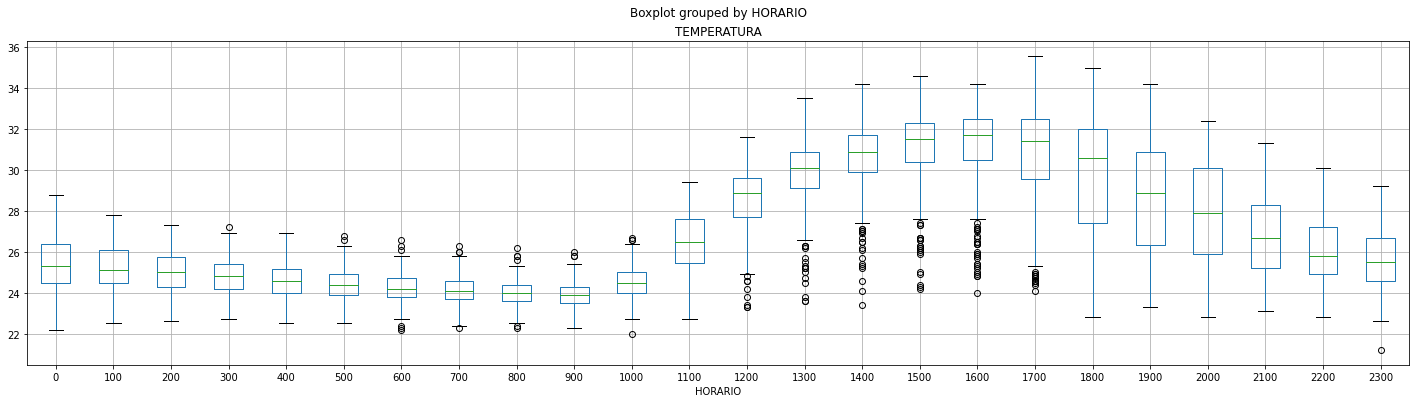

In [8]:
dados.boxplot("TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'UMIDADE'}, xlabel='HORARIO'>

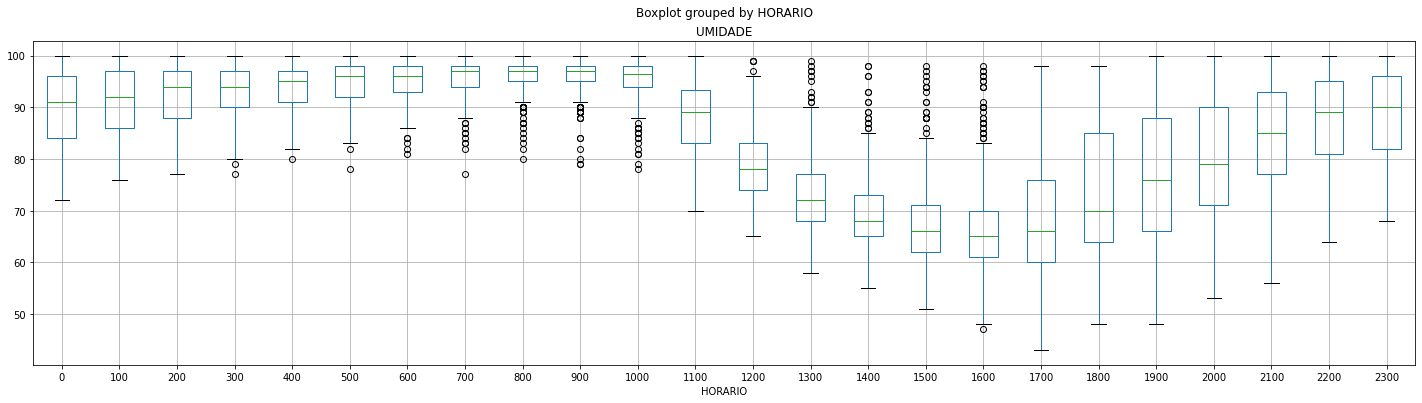

In [9]:
dados.boxplot("UMIDADE", by='HORARIO', figsize=(24,6))

<AxesSubplot:title={'center':'RADIACAO'}, xlabel='HORARIO'>

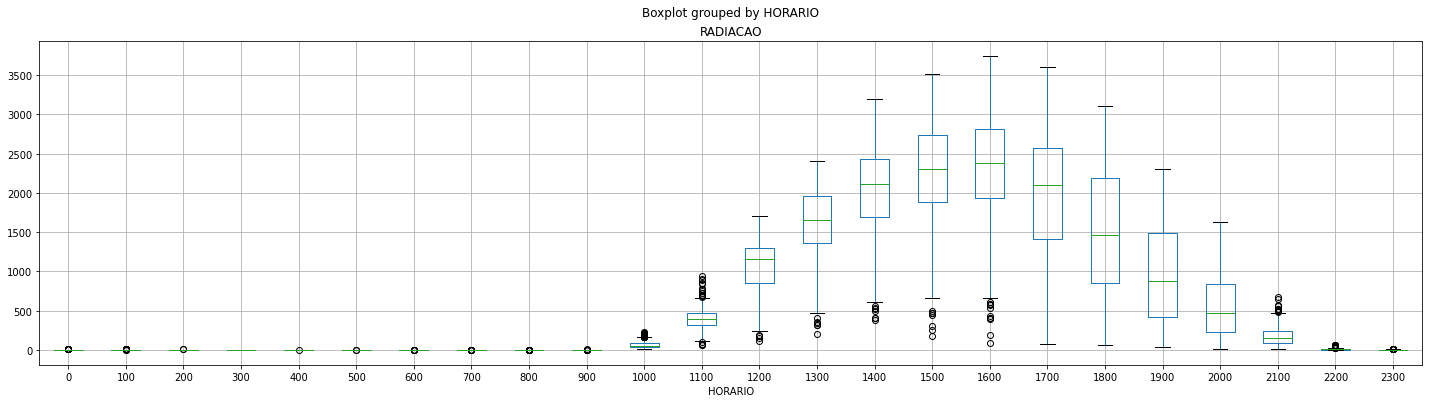

In [10]:
dados.boxplot("RADIACAO", by='HORARIO', figsize=(24,6))

# Verificando a suma de dados null 

In [11]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.000000
HORARIO        0.000000
TEMPERATURA    0.010503
UMIDADE        0.032895
RADIACAO       0.010503
dtype: float64

In [12]:
dados[pd.isnull(dados['TEMPERATURA'])]

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO
3608,2021-09-28,800,NaN,NaN,NaN
3609,2021-09-28,900,NaN,NaN,NaN
3610,2021-09-28,1000,NaN,NaN,NaN
3611,2021-09-28,1100,NaN,NaN,NaN
3612,2021-09-28,1200,NaN,NaN,NaN
...,...,...,...,...,...
7319,2022-03-01,2300,NaN,NaN,NaN
7369,2022-03-04,100,NaN,NaN,NaN
7466,2022-03-08,200,NaN,NaN,NaN
7561,2022-03-12,100,NaN,NaN,NaN


In [13]:
dados = dados.fillna(method='ffill')

In [14]:
dados.apply(pd.isnull).sum()/dados.shape[0]

DATA           0.0
HORARIO        0.0
TEMPERATURA    0.0
UMIDADE        0.0
RADIACAO       0.0
dtype: float64

# verificando se nosso dados são numéricos

In [15]:
dados.dtypes

DATA            object
HORARIO          int64
TEMPERATURA    float64
UMIDADE        float64
RADIACAO       float64
dtype: object

<AxesSubplot:>

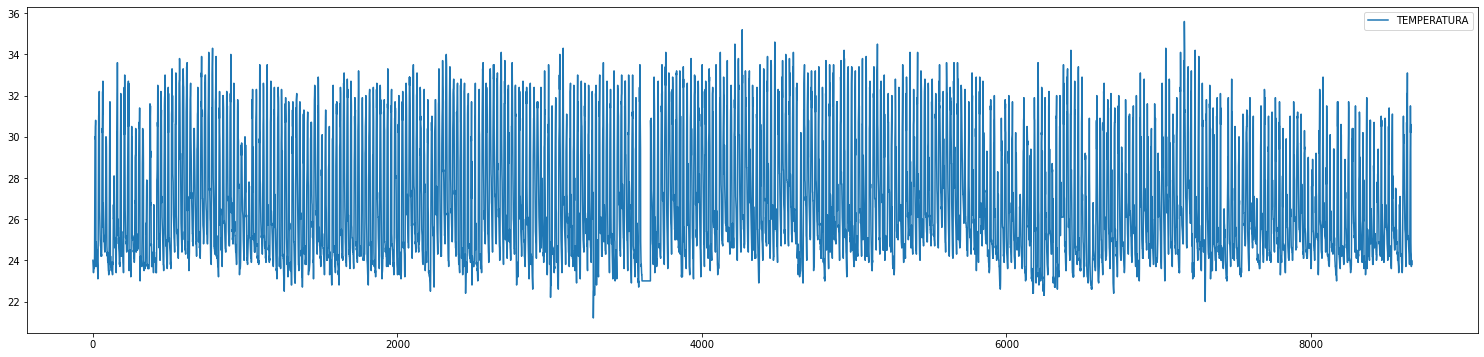

In [16]:
dados[['TEMPERATURA']].plot(figsize=(26,6))

# Agrupando os dados por horário

In [17]:
dados.groupby(dados.HORARIO).sum()

,TEMPERATURA,UMIDADE,RADIACAO
HORARIO,,,
0,9182.7,32493.0,-359.3
100,9107.7,32879.0,-466.8
200,9027.4,33303.0,-560.5
300,8952.7,33664.0,-646.2
400,8880.1,33964.0,-672.7
500,8813.0,34206.0,-691.1
600,8757.8,34403.0,-691.2
700,8705.8,34570.0,-694.1
800,8662.6,34686.0,-692.6


### Criando novos colunas para Temperatura da amahão, Umidade da amahão e Radiação da amahão na tabla  

In [18]:
dados['TEMP_AMAHAO'] = dados.shift(-1)['TEMPERATURA']
dados['UMID_AMAHAO'] = dados.shift(-1)['UMIDADE']
dados['RADI_AMAHAO'] = dados.shift(-1)['RADIACAO']

In [19]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMAHAO,UMID_AMAHAO,RADI_AMAHAO
0,2021-05-01,0,24.0,99.0,4.8,23.8,99.0,3.7
1,2021-05-01,100,23.8,99.0,3.7,23.5,99.0,2.4
2,2021-05-01,200,23.5,99.0,2.4,23.5,99.0,1.4
3,2021-05-01,300,23.5,99.0,1.4,23.4,98.0,1.8
4,2021-05-01,400,23.4,98.0,1.8,23.5,98.0,0.5
...,...,...,...,...,...,...,...,...
8659,2022-04-26,1900,24.3,97.0,70.9,23.7,97.0,35.9
8660,2022-04-26,2000,23.7,97.0,35.9,23.9,97.0,58.4
8661,2022-04-26,2100,23.9,97.0,58.4,24.0,98.0,5.9
8662,2022-04-26,2200,24.0,98.0,5.9,23.8,98.0,0.8


## Deletando a utimos lina da coluna qui está NULL

In [20]:
dados = dados.iloc[:-1, :].copy()

In [21]:
dados

,DATA,HORARIO,TEMPERATURA,UMIDADE,RADIACAO,TEMP_AMAHAO,UMID_AMAHAO,RADI_AMAHAO
0,2021-05-01,0,24.0,99.0,4.8,23.8,99.0,3.7
1,2021-05-01,100,23.8,99.0,3.7,23.5,99.0,2.4
2,2021-05-01,200,23.5,99.0,2.4,23.5,99.0,1.4
3,2021-05-01,300,23.5,99.0,1.4,23.4,98.0,1.8
4,2021-05-01,400,23.4,98.0,1.8,23.5,98.0,0.5
...,...,...,...,...,...,...,...,...
8658,2022-04-26,1800,24.4,97.0,145.7,24.3,97.0,70.9
8659,2022-04-26,1900,24.3,97.0,70.9,23.7,97.0,35.9
8660,2022-04-26,2000,23.7,97.0,35.9,23.9,97.0,58.4
8661,2022-04-26,2100,23.9,97.0,58.4,24.0,98.0,5.9


In [22]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=2.0)

In [23]:
preditores = ['HORARIO', 'TEMPERATURA','UMIDADE', 'RADIACAO']

In [35]:
def criar_previsões_temp(preditores, dados, reg):
    trinar = dados.loc[:8640]
    teste = datos.loc[8640:]
    reg.fit(trinar[preditores], trinnar["TEMP_AMAHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["TEMP_AMAHAO"],preditores)
    conjunto = pd.concat([teste["TEMP_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_TEMPERATUA", "PREVISOES_TEMPERATUA"]
    return erro, conjunto

In [ ]:
def criar_previsões_temp(preditores, dados, reg):
    trinar = dados.loc[:8640]
    teste = datos.loc[8640:]
    reg.fit(trinar[preditores], trinnar["UMID_AMAHAO"])
    preditores = reg.predict(teste[preditores])
    erro = mean_absolute_percentage_error(teste["UMID_AMAHAO"],preditores)
    conjunto = pd.concat([teste["UMID_AMANHAO"], pd.Series(preditores, index=teste.index)], axis=1)
    conjunto.columns = ["ATUAL_TEMPERATUA", "PREVISOES_TEMPERATUA"]
    return erro, conjunto

In [24]:
trinar = dados[:8640]

In [25]:
test = dados[8640:]

In [26]:
reg.fit(trinar[preditores], trinar['TEMP_AMAHAO'])

Ridge(alpha=2.0)

In [27]:
previsoes = reg.predict(test[preditores])

In [28]:
from sklearn.metrics import mean_absolute_percentage_error

In [29]:
mean_absolute_percentage_error(test['TEMP_AMAHAO'], previsoes)

0.03694735968607712

In [30]:
conjunto = pd.concat([test['TEMP_AMAHAO'], pd.Series(previsoes, index=test.index )], axis=1)
conjunto.columns = ['ATUAL_TEMPERATUA', 'PREVISOES_TEMPERATURA']

In [31]:
conjunto["HORARIO"] = dados[["HORARIO"]]

In [32]:
conjunto

,ATUAL_TEMPERATUA,PREVISOES_TEMPERATURA,HORARIO
8640,24.8,25.350778,0
8641,24.7,25.113641,100
8642,24.5,24.982932,200
8643,24.4,24.808546,300
8644,24.3,24.718448,400
8645,24.0,24.646795,500
8646,23.9,24.389380,600
8647,23.8,24.318586,700
8648,24.1,24.228145,800
8649,24.7,24.472624,900


<AxesSubplot:title={'center':'PREVISOES_TEMPERATURA'}, xlabel='HORARIO'>

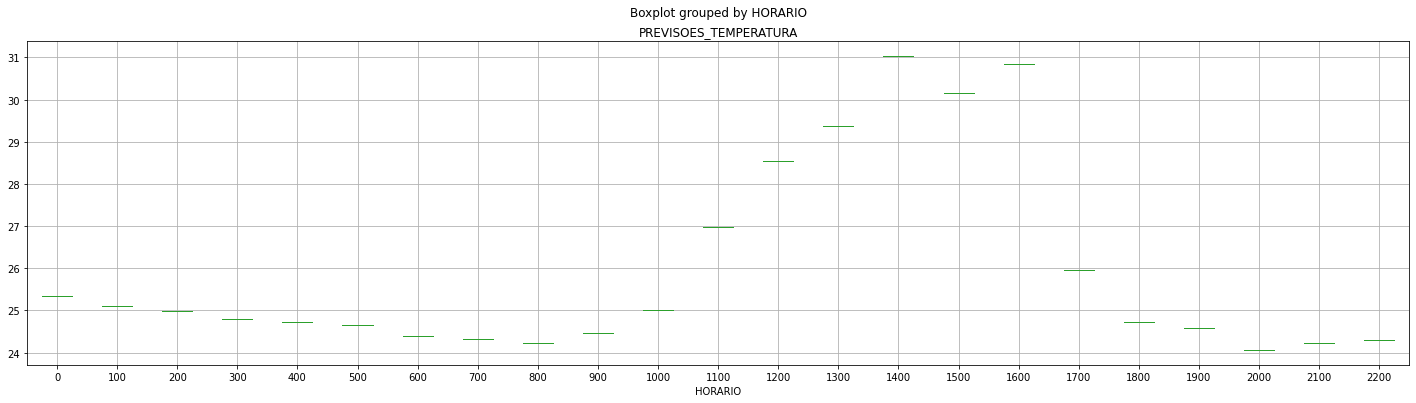

In [33]:
conjunto.boxplot("PREVISOES_TEMPERATURA", by='HORARIO', figsize=(24,6))

<AxesSubplot:xlabel='PREVISOES_TEMPERATURA'>

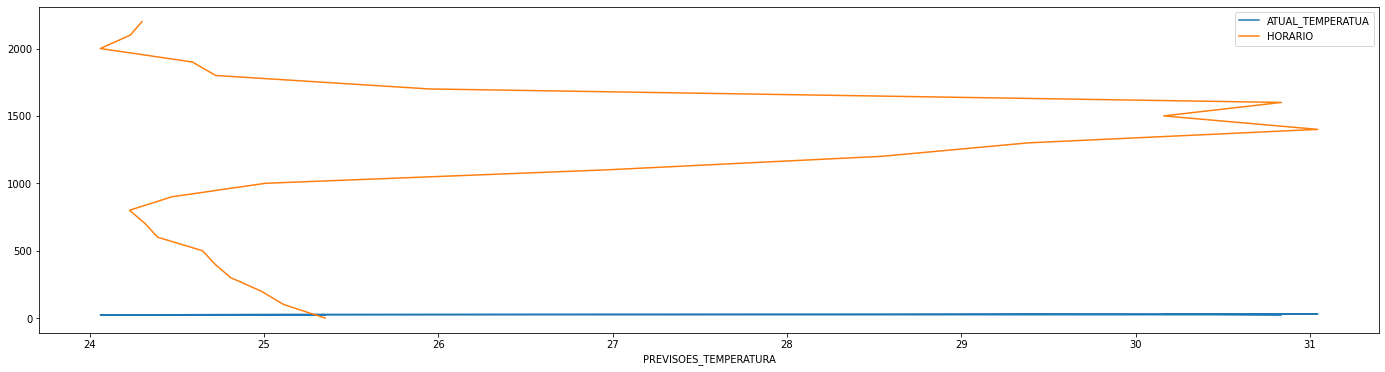

In [34]:
conjunto.plot("PREVISOES_TEMPERATURA", figsize=(24,6))